# Rydberg-atom ion interaction

Here we look at the interacton between a single ion and a Rydberg atom. More details regarding the theory can be found in [A. Duspayev et al., Phys. Rev. Research 3, 023114 (2021)](https://doi.org/10.1103/PhysRevResearch.3.023114) or [M. Deiß et al., Atoms 9, 2 (2021)](https://doi.org/10.3390/atoms9020034). The inernuclear axis is aligned with the z-direction and the interaction is expanded in multipolar terms. With this choice of coordinate system, the interaction potential is rotationally symmetric around the quantization axis and only states of same $m_J$ couple with each other, reducing the number of basis states.

We will reproduce here Fig. 2 (a) and (b) from Phys. Rev. Research 3, 023114 (2021), showing the influence of higher multipole order terms

## Import the library

In [5]:
# We call an IPython magic function to make the output of plotting commands displayed inline.
%matplotlib inline

# Arrays
import numpy as np

# Plotting
import matplotlib.pyplot as plt

# Operating system interfaces
import os, sys

# If the pairinteraction library was not installed via pip or using a Linux package manager,
# we have to manually add the library path to the Python package search path. If the library
# was for example installed using the Windows or macOS installers from GitHub releases, this
# can be done by uncomment the following code block:
#
# import sys
# if sys.platform == "darwin":
#     sys.path.append("/Applications/pairinteraction.app/Contents/Resources")
# elif sys.platform == "win32":
#     sys.path.append("C:\Program Files\pairinteraction")

# pairinteraction :-)
from pairinteraction import pireal as pi

# Create cache for matrix elements
if not os.path.exists("./cache"):
    os.makedirs("./cache")
cache = pi.MatrixElementCache("./cache")

## Application: Potential curves

The SystemOne class defines the Rydberg atom and the effect of the electric field of the ion can be included into the calculations. The charge of the ion in units of the elementary charge can be passed by SystemOne.setIonCharge(charge) and the distance between the ion and the Rydberg core with SystemOne.setRydIonDistance(distance) in units of micrometer. The orientatin is fixed such that the internuclear axis points along the z-axis.

As an example we show how to calculate the energy of the Rydberg state for different internuclear distances and including a different number of multipole orders. Choosing a maximum multipole order of one is equivalent to calculating a StarkMap in a homogenious electric field.

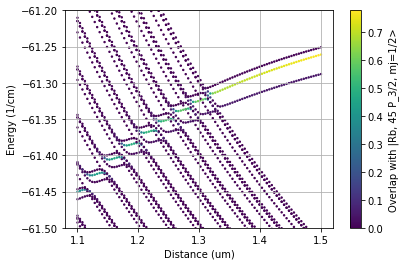

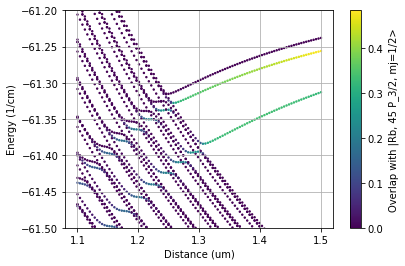

In [38]:
# Define the Rydberg state for which the interaction with the ion should be calculated
state = pi.StateOne("Rb", 45, 1, 1.5, 0.5)

# Setup system, considering states only with similar energy and principle quantum number.
LowN = 39
HighN = 49
LowEnergy = -302
HighEnergy = 347
system = pi.SystemOne(state.getSpecies(), cache)
system.restrictEnergy(state.getEnergy()+LowEnergy, state.getEnergy()+HighEnergy)
system.restrictN(LowN, HighN)
system.restrictM(-1.5,1.5)

#define the charge of the ion in units of the elementary charge
system.setIonCharge(1)

#define the maximum considered order of the multipole expansion.
# 1: monopole-dipole, 2: monopole-quadrupole, ...
system.setRydIonOrder(1) 

# Since the ion and Rydberg atom are placed on the z-axis, the magnetic momentum is conserved
system.setConservedMomentaUnderRotation([0.5, 1.5])

# Loop over different distances to the ion
array_distances = np.linspace(1.5,1.1, 100) # um
array_eigenvalues = []
array_overlaps = []

for distance in array_distances:
    #set the ion Rydberg-atom distance in units of um
    system.setRydIonDistance(distance)
    #Diagonalize the system 
    system.diagonalize()
    #store the eigenenergies
    array_eigenvalues.append(system.getHamiltonian().diagonal())
    # Store the overlap of the eigenstates with the defined state
    array_overlaps.append(system.getOverlap(state)) 

array_eigenvalues = np.ravel(array_eigenvalues)
array_overlaps = np.ravel(array_overlaps)
array_distances = np.repeat(array_distances, system.getNumBasisvectors())
array_eigenvalues = array_eigenvalues / 29.9792458 # convert GHz into inverse cm wavenumber

# Plot the interaction potential, the color code visualizes overlap of eigenstates with defined state
plt.scatter(array_distances, array_eigenvalues, 2, array_overlaps)
plt.xlabel("Distance (um)")
plt.ylabel("Energy (1/cm)")
plt.colorbar(label="Overlap with {}".format(state))
plt.grid();
plt.ylim(-61.5,-61.2);
plt.show();


#calculate the same but including orders up to 6
system.setRydIonOrder(6) 

# Loop over different distances to the ion
array_distances = np.linspace(1.5,1.1, 100) # um
array_eigenvalues = []
array_overlaps = []

for distance in array_distances:
    #set the ion Rydberg-atom distance in units of um
    system.setRydIonDistance(distance)
    #Diagonalize the system 
    system.diagonalize()
    #store the eigenenergies
    array_eigenvalues.append(system.getHamiltonian().diagonal())
    # Store the overlap of the eigenstates with the defined state
    array_overlaps.append(system.getOverlap(state))   

array_eigenvalues = np.ravel(array_eigenvalues)
array_overlaps = np.ravel(array_overlaps)
array_distances = np.repeat(array_distances, system.getNumBasisvectors())
array_eigenvalues = array_eigenvalues / 29.9792458 # convert GHz into inverse cm wavenumber

# Plot the interaction potential, the color code visualizes overlap of eigenstates with defined state
plt.scatter(array_distances, array_eigenvalues, 2, array_overlaps)
plt.xlabel("Distance (um)")
plt.ylabel("Energy (1/cm)")
plt.colorbar(label="Overlap with {}".format(state))
plt.grid();
plt.ylim(-61.5,-61.2);
plt.show();